# Exploratory Data Analysis Starter

### by Raghav Khanna

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [3]:
client_df.shape

(14606, 26)

In [4]:
price_df.shape

(193002, 8)

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
client_df.duplicated().sum()

0

In [7]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
price_df.duplicated().sum()

0

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Encoding Categorical Values

In [13]:
def has_gas(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

In [14]:
client_df['has_gas'] = client_df['has_gas'].apply(has_gas)
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [15]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

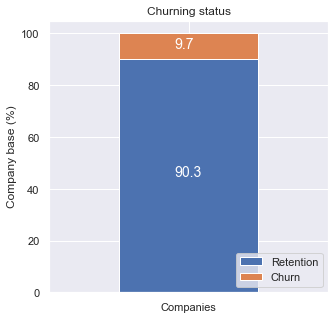

In [16]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

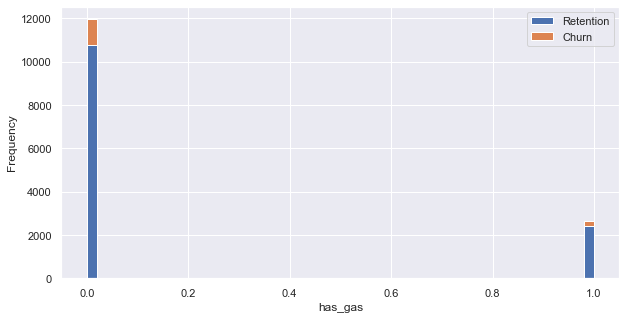

In [17]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
plot_distribution(consumption, 'has_gas', axs)

In [18]:
def plot_hist(data,columns,rows):
    num_subplots = len(columns)
    cols= (num_subplots + 1) // rows
    fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(20,15))

    axs = axs.flatten()

    for i,column in enumerate(columns):
        axs[i].hist([data[data['churn']==0][column],data[data['churn']==1][column]],bins=50,alpha=0.7,stacked=True,label=['Churn 0','Churn 1'],color=['r','b'])
        axs[i].set_title(f'Distribution of {column}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')
        axs[i].legend()
    
    if num_subplots < len(axs):
        for j in range(num_subplots, len(axs)):
            fig.delaxes(axs[j])

    fig.tight_layout()
    plt.tight_layout()

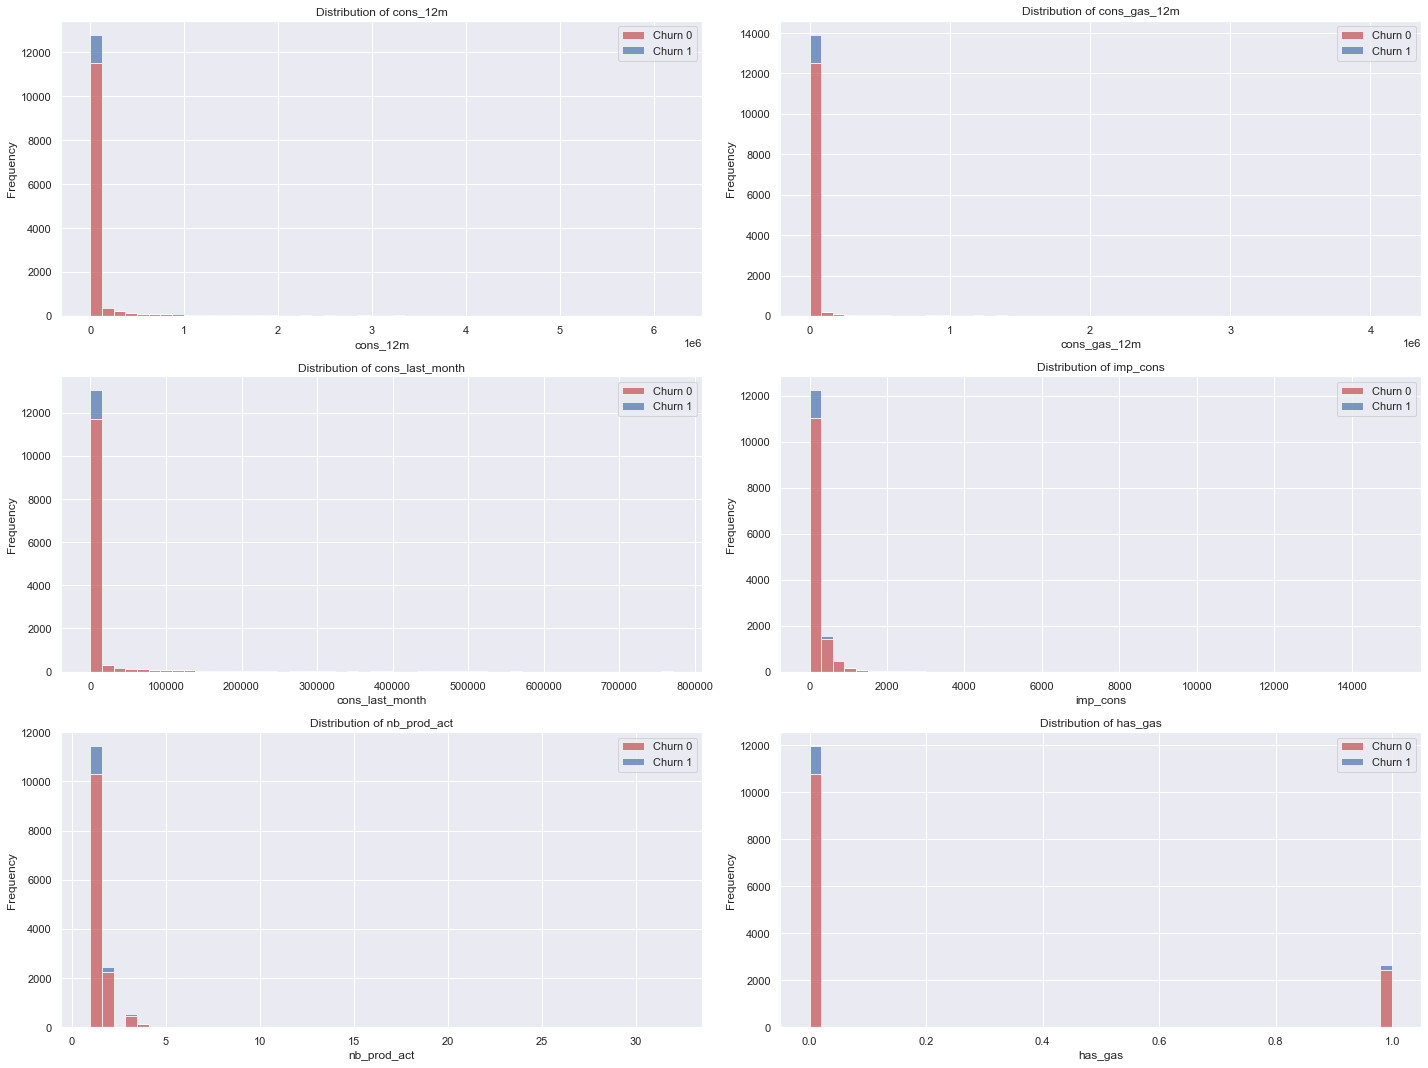

In [19]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons','nb_prod_act', 'has_gas', 'churn']]
columns= [ 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons','nb_prod_act', 'has_gas']

plot_hist(consumption,columns,3)


### Identifying outliers

In [20]:
def plot_boxplot(data,columns,rows):
    num_subplots = len(columns)
    cols = (num_subplots + 1) // rows  # Adjust the number of columns based on the number of subplots
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    axs = axs.flatten()

    for i, column in enumerate(columns):

        axs[i].boxplot([data[data['churn'] == 0][column], data[data['churn'] == 1][column]])
        axs[i].set_title(f'Box Plot of {column}')
        axs[i].set_xlabel('Churn')
        axs[i].set_ylabel(column)
        axs[i].set_xticklabels(['Churn 0', 'Churn 1'])

    if num_subplots < len(axs):
        for j in range(num_subplots, len(axs)):
            fig.delaxes(axs[j])
    fig.tight_layout()
    plt.show()

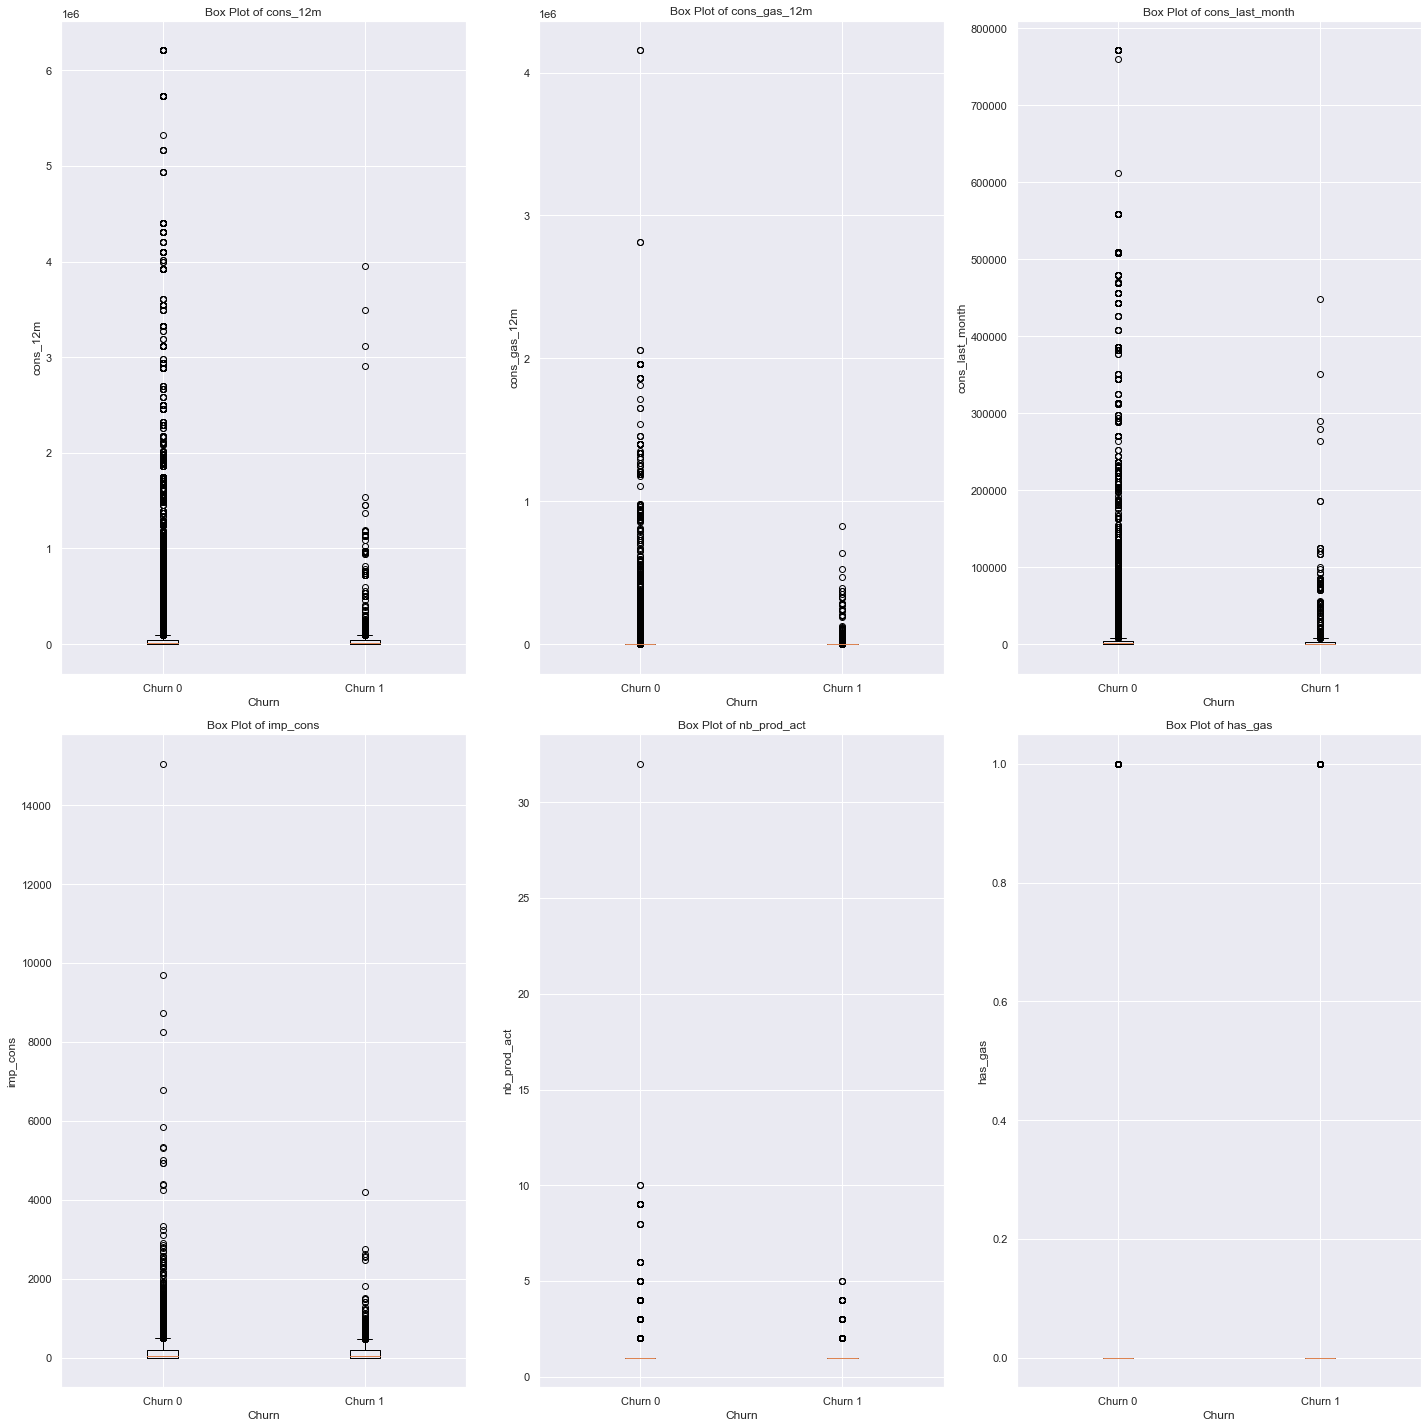

In [21]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons','nb_prod_act', 'has_gas', 'churn']]
columns= [ 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons','nb_prod_act', 'has_gas']

plot_boxplot(consumption,columns,2)


In [46]:
counts = client_df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

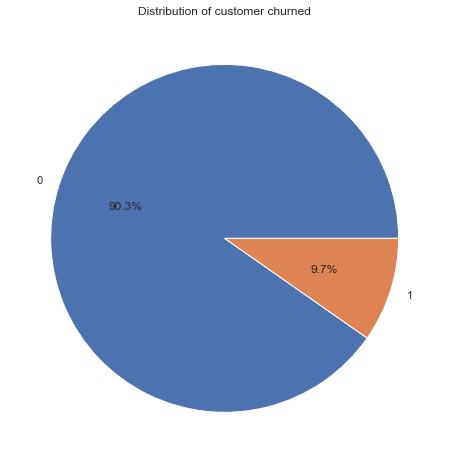

In [52]:
counts = client_df['churn'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(counts, labels= counts.index, autopct ='%1.1f%%')
plt.title(f'Distribution of customer churned')
plt.show()

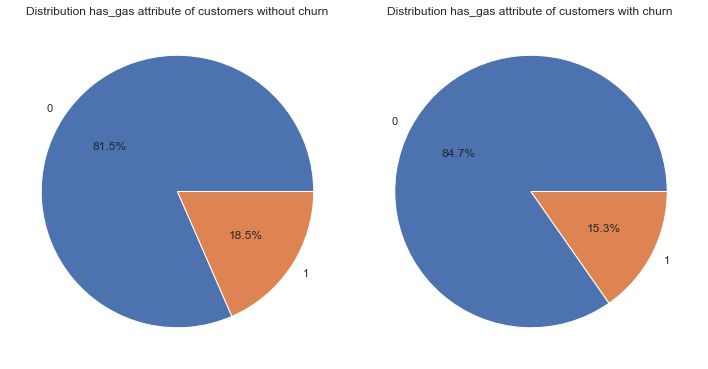

In [22]:
counts = consumption[consumption['churn']==0]['has_gas'].value_counts()
counts1 = consumption[consumption['churn']==1]['has_gas'].value_counts()
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))
ax[0].pie(counts, labels=counts.index, autopct='%1.1f%%')
ax[0].set_title(f'Distribution has_gas attribute of customers without churn')
ax[1].pie(counts1, labels=counts.index, autopct='%1.1f%%')
ax[1].set_title(f'Distribution has_gas attribute of customers with churn ')
plt.tight_layout()
plt.show()

C:\Users\ragha\AppData\Local\Temp\ipykernel_7592\2978205135.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(channel_labels, rotation=90)


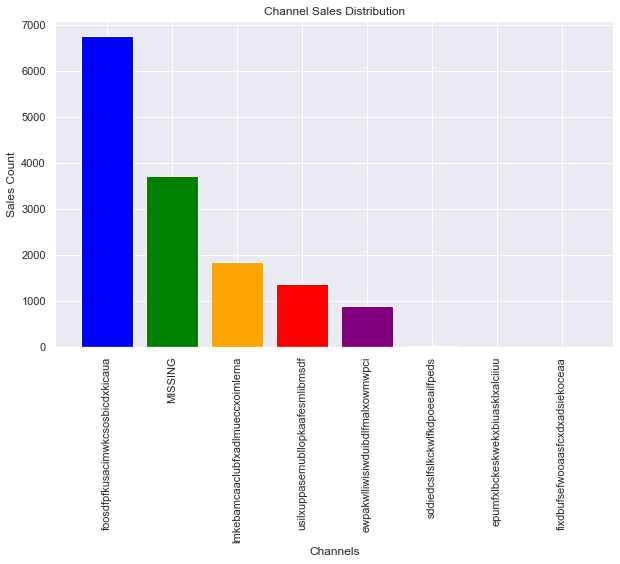

In [23]:
# channel sales count
import numpy as np

channel_count = client_df['channel_sales'].value_counts()
channel_labels = channel_count.index
colors = ['blue', 'green', 'orange', 'red', 'purple','black','yellow','cyan']
bar_colors = np.array(colors[:len(channel_count)])
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(channel_labels,channel_count,color=bar_colors)
ax.set_title(f'Channel Sales Distribution')
ax.set_xlabel('Channels')
ax.set_xticklabels(channel_labels, rotation=90)
ax.set_ylabel('Sales Count')
plt.show()

### Forecast

In [24]:
forecast = client_df[["id","forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]
forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


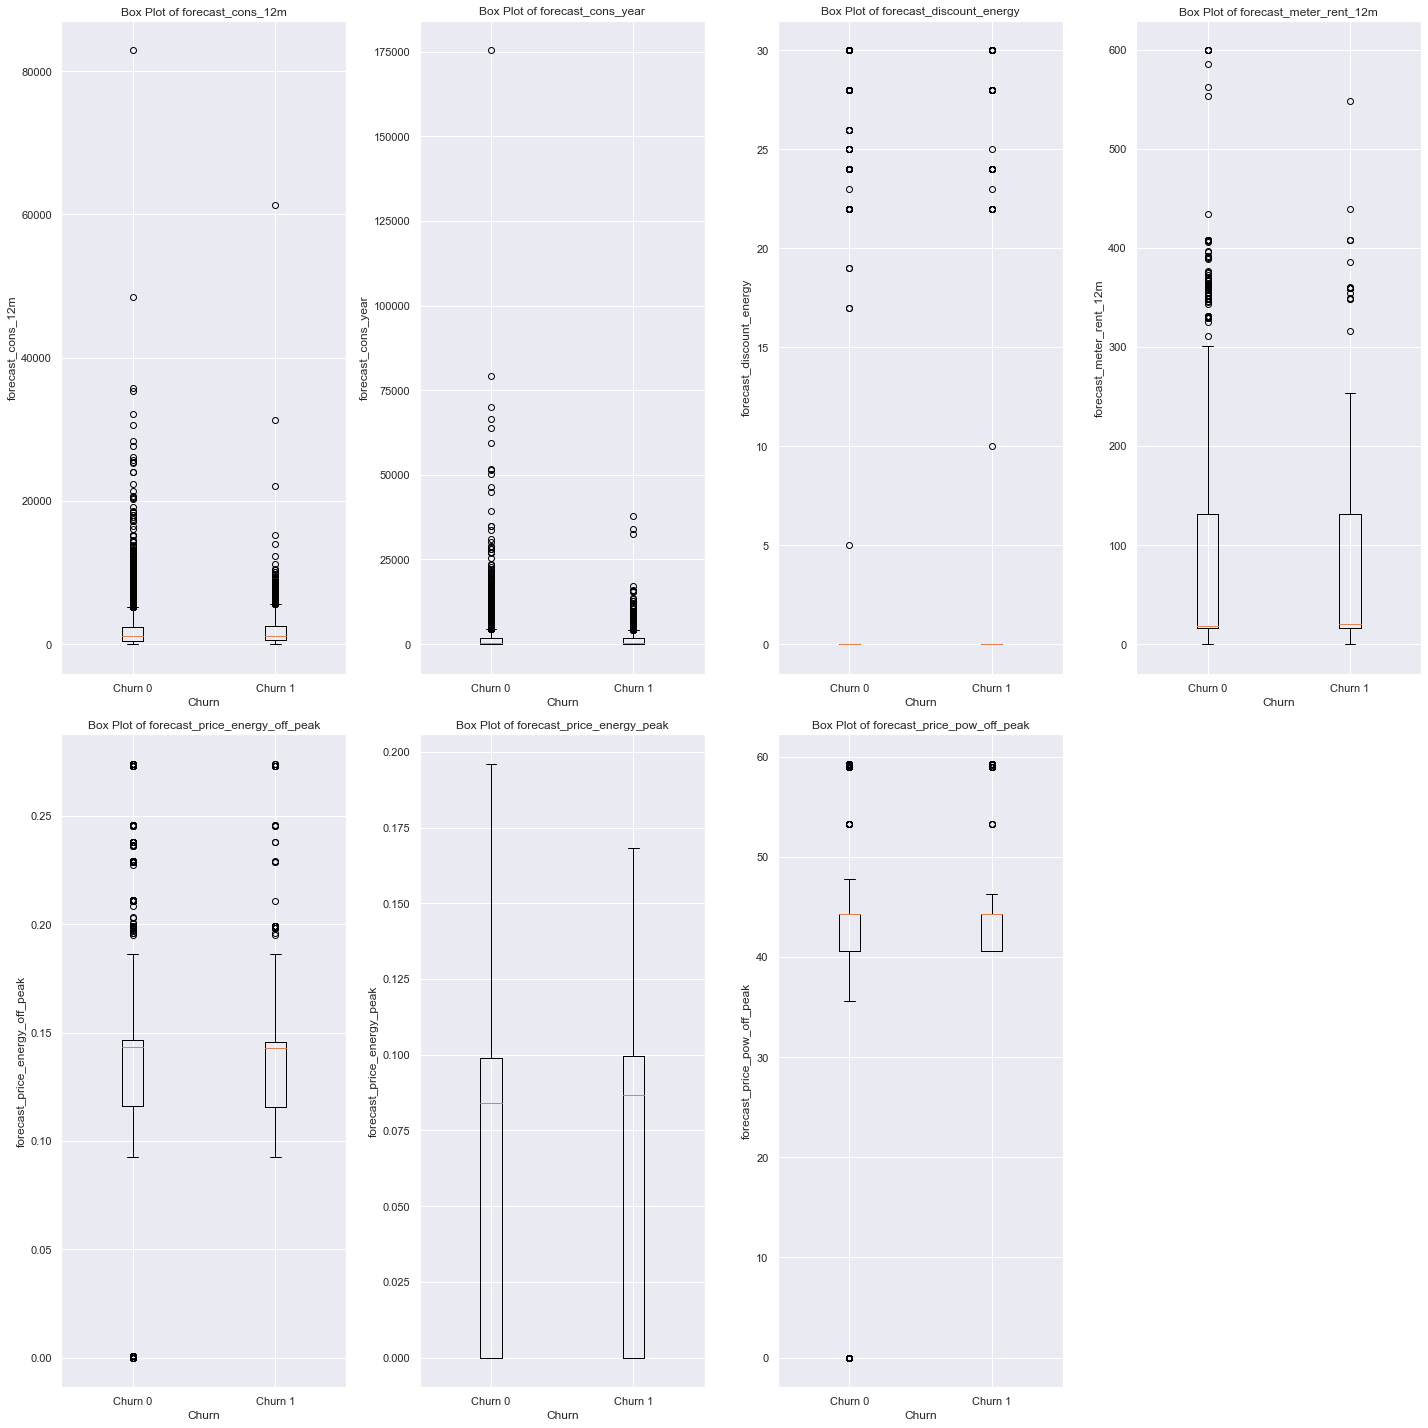

In [25]:
# box plot
columns = ["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]

plot_boxplot(forecast,columns,2)


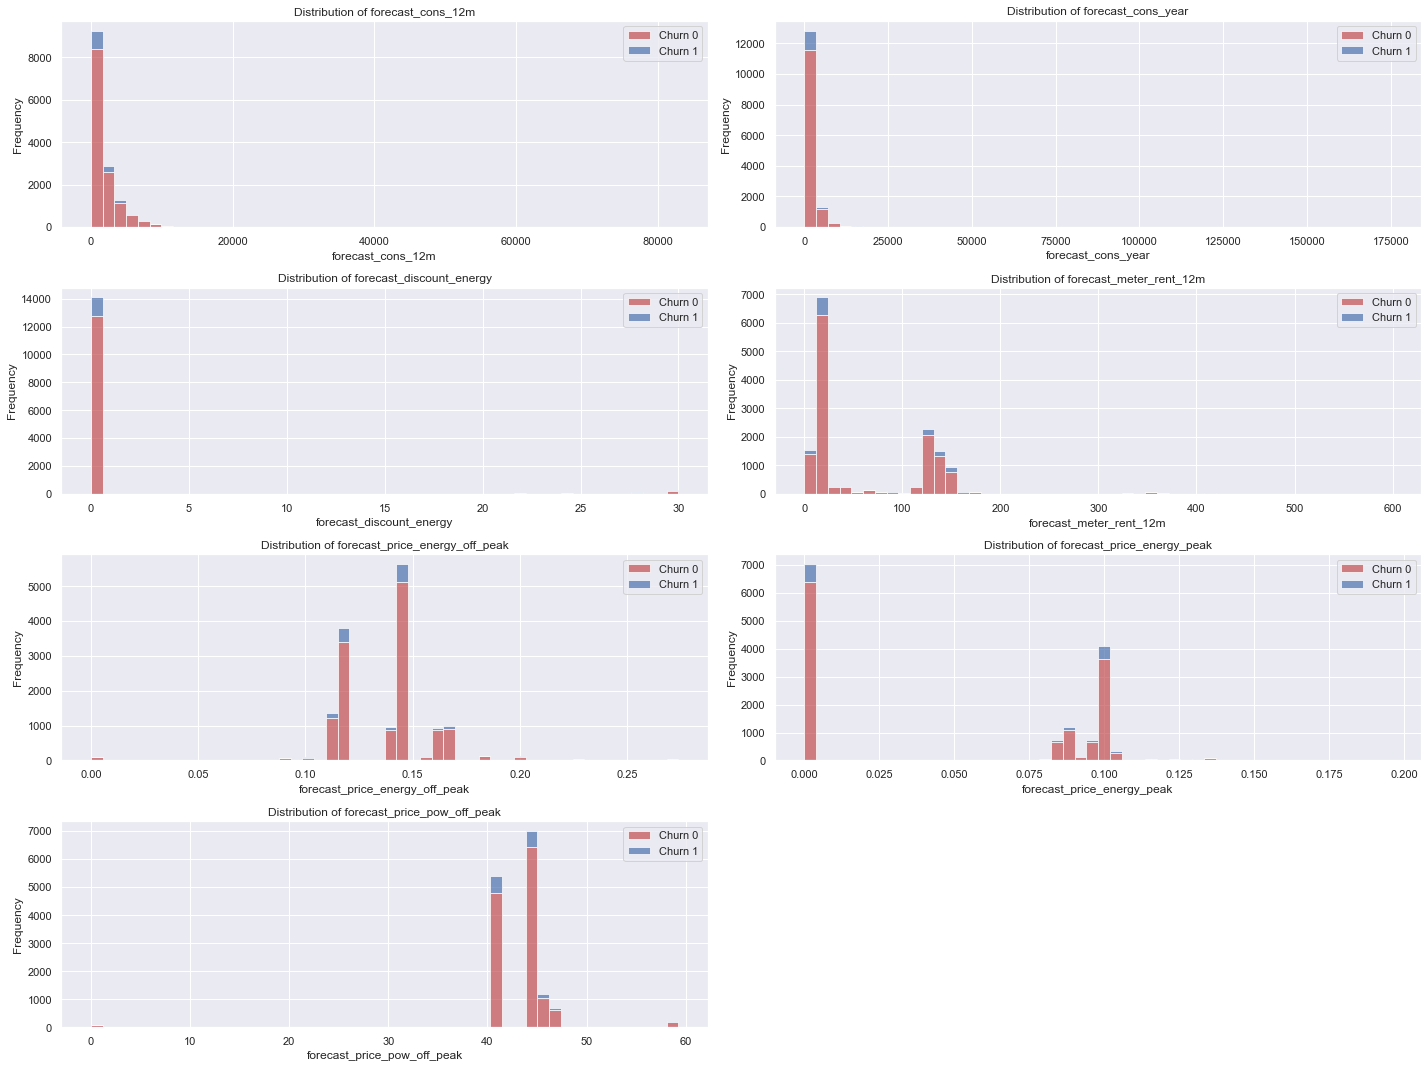

In [26]:
plot_hist(forecast,columns,4)

### Margins

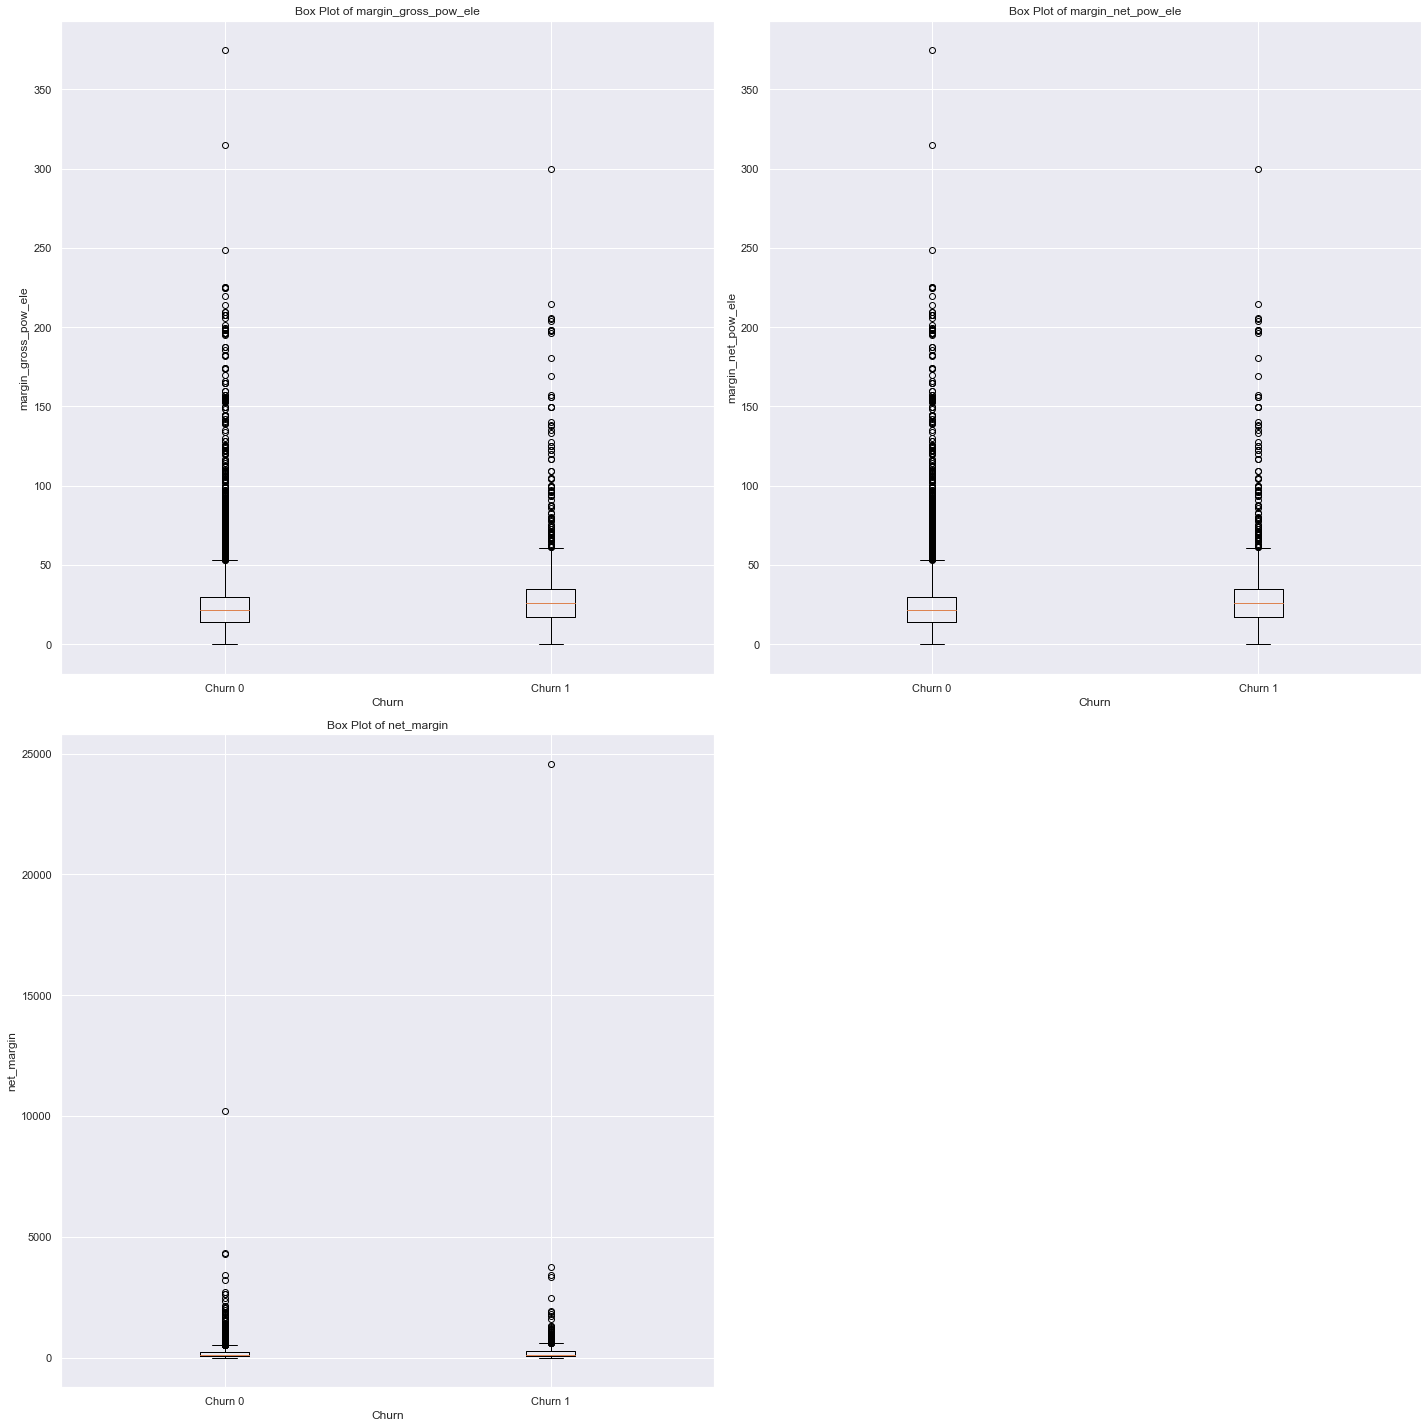

In [27]:
data = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]
cols = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']
plot_boxplot(data,cols,2)

### Price

In [28]:
def plot_hist_without_churn(data,columns,rows):
    num_subplots = len(columns)
    cols= (num_subplots + 1) // rows
    fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(20,15))

    axs = axs.flatten()

    for i,column in enumerate(columns):
        axs[i].hist(data[column],bins=50,alpha=0.7)
        axs[i].set_title(f'Distribution of {column}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')
        axs[i].legend()
    
    if num_subplots < len(axs):
        for j in range(num_subplots, len(axs)):
            fig.delaxes(axs[j])

    fig.tight_layout()
    plt.tight_layout() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


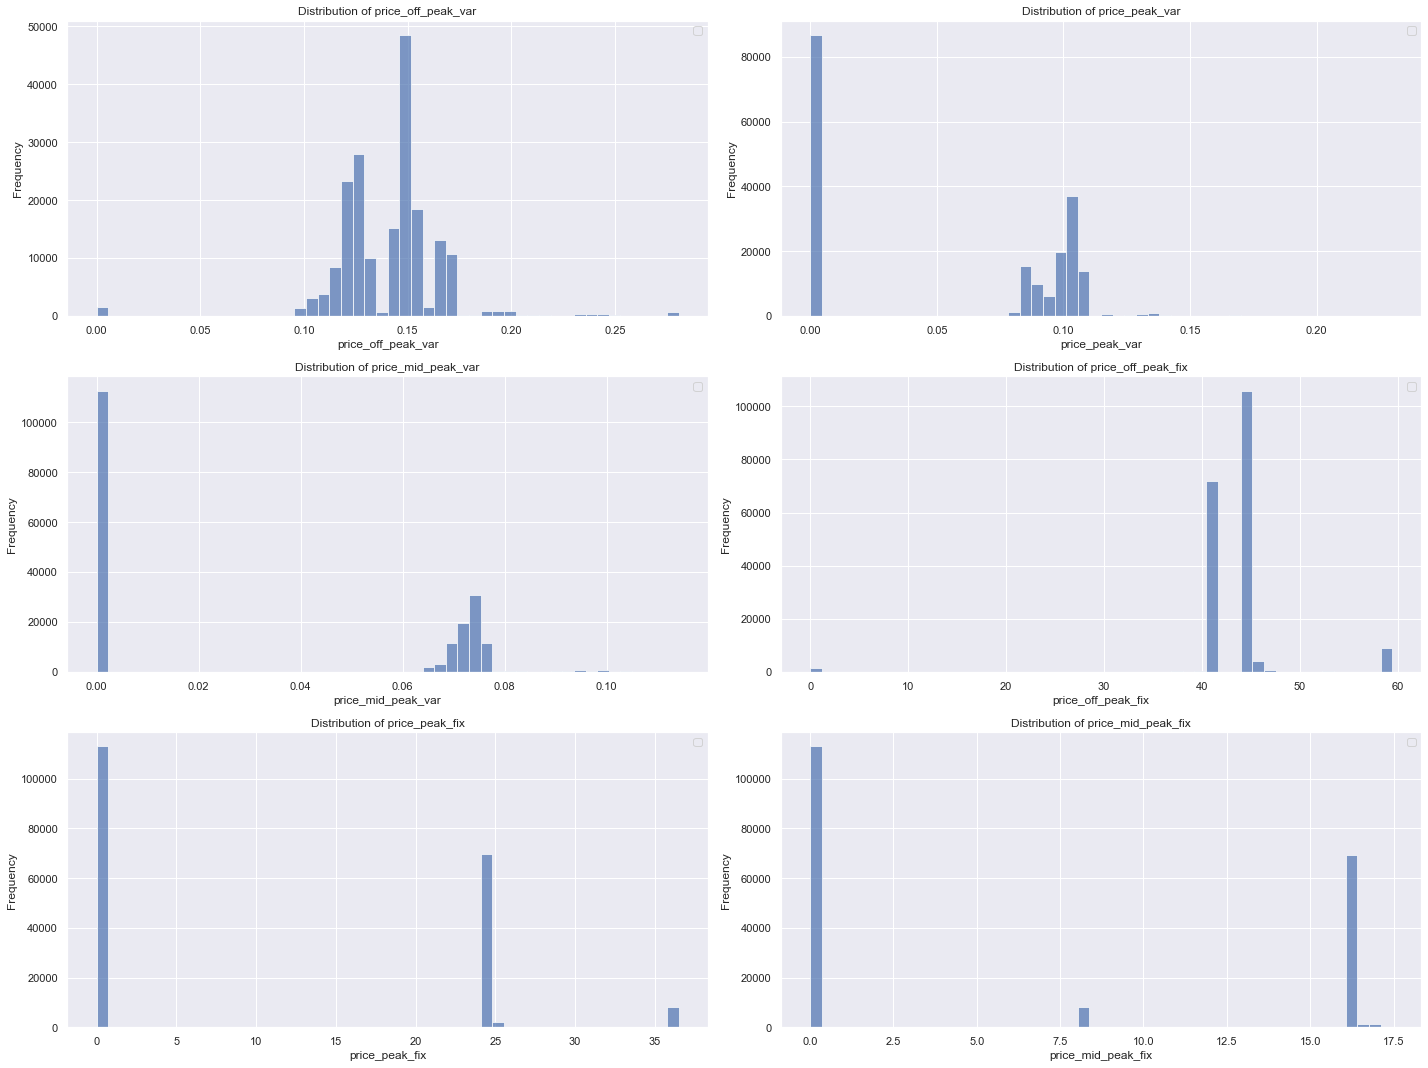

In [29]:
price = price_df[['id','price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']]
cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
plot_hist_without_churn(price,cols,3)

# Hypothesis Investigation 

### Since, all the prices except for prices_off_peak are high at 0, this could mean that range of customers mayn't be sensitive to price. So we will be investigating only price off peak.

In [30]:
# converting dates to datetime data type.

client_df['date_activ'] = pd.to_datetime(client_df['date_activ'],format='%Y-%m-%d')
client_df['date_end'] = pd.to_datetime(client_df['date_end'],format='%Y-%m-%d')
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'],format='%Y-%m-%d')
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'],format='%Y-%m-%d')

price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [31]:
mean_year = price_df.groupby('id').mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby('id').mean().reset_index()

In [32]:
mean_year.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000


In [33]:
mean_6m.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000


In [34]:
mean_3m.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000


In [35]:
def rename_cols(df,name):
    cols = list(df.columns)
    cols = cols[1:]
    dict_cols = {}
    for col in cols:
        dict_cols[col] = str(name) +"_" + str(col)
    df = df.rename(index = str, columns = dict_cols)
    return df


In [36]:
mean_year = rename_cols(mean_year,'mean_year')
mean_6m = rename_cols(mean_6m,'mean_6m')
mean_3m = rename_cols(mean_3m,'mean_3m')

In [37]:
mean_6m.head(3)

,id,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000


In [38]:
def mean_sum(df,name_cols):
    for name_col in name_cols:
        df[name_col] = df[str(name_col) + "_var"] + df[str(name_col) + "_fix"]
    return df

In [39]:
names = ['mean_3m', 'mean_6m', 'mean_year']
cols = ['price_off_peak','price_mid_peak','price_peak']

name_cols = []
concat_names = lambda name: [ (name + "_"+ col) for col in cols]

for name in names:
    name_cols.append(concat_names(name))

print(name_cols)

[['mean_3m_price_off_peak', 'mean_3m_price_mid_peak', 'mean_3m_price_peak'], ['mean_6m_price_off_peak', 'mean_6m_price_mid_peak', 'mean_6m_price_peak'], ['mean_year_price_off_peak', 'mean_year_price_mid_peak', 'mean_year_price_peak']]


In [40]:
mean_3m = mean_sum(mean_3m,name_cols[0])
mean_6m = mean_sum(mean_6m,name_cols[1])
mean_year = mean_sum(mean_year,name_cols[2])

In [41]:
price_features = pd.merge(mean_3m,mean_6m,on='id')
price_features = pd.merge(price_features,mean_year,on='id')
price_features.head(3)

,id,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_mid_peak,mean_3m_price_peak,...,mean_6m_price_peak,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_mid_peak,mean_year_price_peak
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003,...,24.539698,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,16.353854,24.524832
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,...,0.000000,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,...,0.000000,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000


In [42]:
client_data = client_df[['id','churn']]
price_analysis = pd.merge(price_features,client_data,on='id')
price_analysis.head(3)

,id,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_mid_peak,mean_3m_price_peak,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_mid_peak,mean_year_price_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003,...,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,16.353854,24.524832,0
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,...,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,...,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0


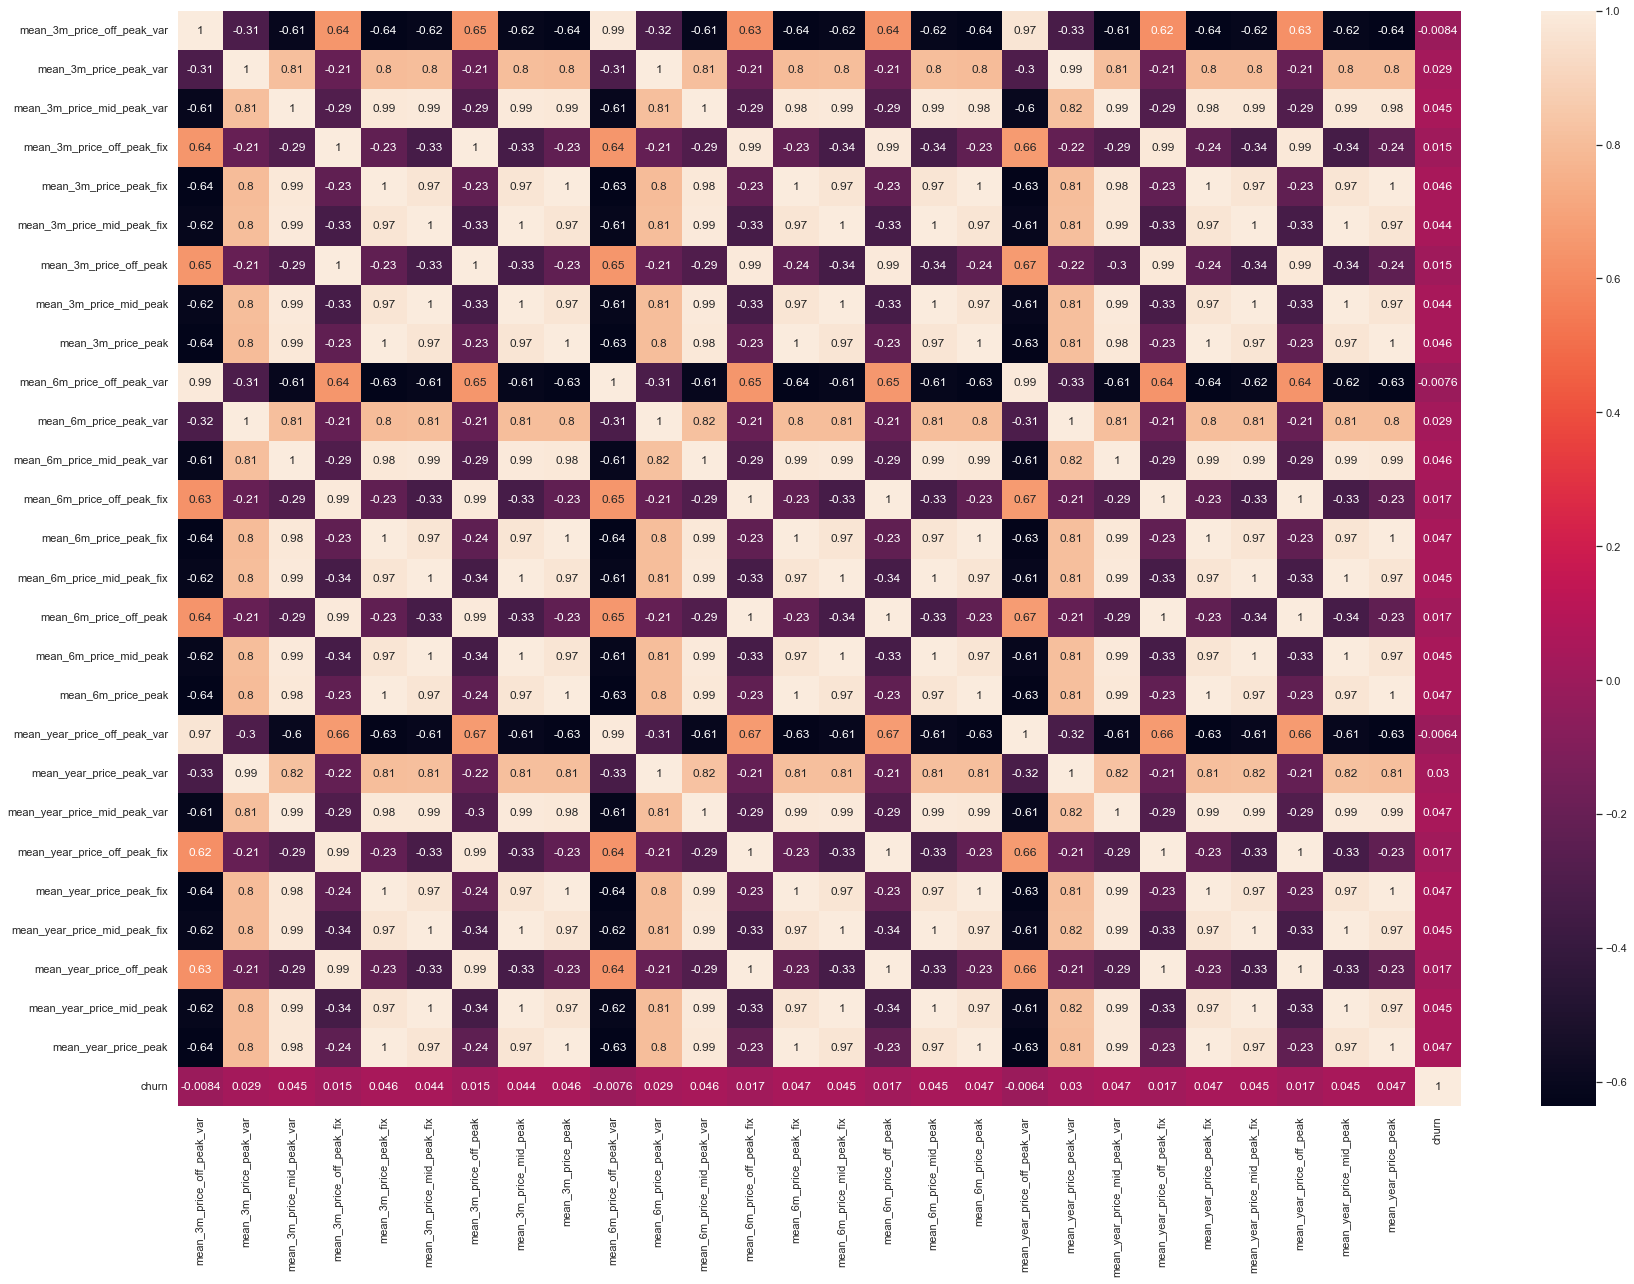

In [43]:
import seaborn as sns

corr = price_analysis.corr()
fig,ax= plt.subplots(figsize=(25,18))
sns.heatmap(data= corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,ax=ax,annot=True)
plt.tight_layout()
plt.show()

Although the correlation with churn is quite modest according to the heatmap, the heatmap reveals there is high degree of correaltion between other price variable. This implies if we want to use price senstivity as our hypothesis to be true, we may need to develop some other price features.

In [44]:
merged_data = pd.merge(client_df.drop(columns=['churn']),price_analysis, on='id')
merged_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_mid_peak,mean_year_price_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,14.967871,22.452760,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,0.007124,0.00000,44.311375,0.00000,0.00000,44.460984,0.000000,0.007124,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,0.088421,0.00000,44.385450,0.00000,0.00000,44.555962,0.000000,0.088421,0


Saving merged and clean data to .csv

In [45]:
merged_data.to_csv('clean_eda_data.csv')